In [1]:
import pandas as pd
df=pd.read_csv("emotion.csv")
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [2]:
df.shape

(16000, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [4]:
df.label.value_counts()

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

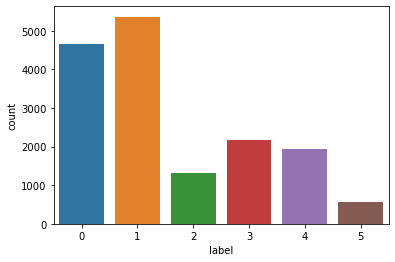

In [5]:
import seaborn as sns
sns.countplot(x=df.label)

In [7]:
#checking for missing values
df.isna().sum()

text     0
label    0
dtype: int64

# Text Processing

In [9]:
#converts text to lower case
df['text']=df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\K HARSHINI
[nltk_data]     DEVI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
df['text']=df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [12]:
from nltk.stem import WordNetLemmatizer
from textblob import Word
df['text']=df['text'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))
df['text'].head()

0                                didnt feel humiliated
1    go feeling hopeless damned hopeful around some...
2            im grabbing minute post feel greedy wrong
3    ever feeling nostalgic fireplace know still pr...
4                                      feeling grouchy
Name: text, dtype: object

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(df['text'])
x=x.toarray()
y=df.label.values

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,
                                                 test_size=0.2,shuffle=True)

In [16]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model=model.fit(x_train,y_train)
pred=model.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
print(confusion_matrix(y_test, pred))

[[293 116 117 144 171  64]
 [175 388 193  96 132  69]
 [ 48  60 103  15  32  13]
 [ 84  85  53 146  58  33]
 [ 84  61  38  37 147  30]
 [ 23  16  10   5  20  41]]


In [19]:
print(accuracy_score(y_test, pred))

0.349375


In [20]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.41      0.32      0.36       905
           1       0.53      0.37      0.44      1053
           2       0.20      0.38      0.26       271
           3       0.33      0.32      0.32       459
           4       0.26      0.37      0.31       397
           5       0.16      0.36      0.22       115

    accuracy                           0.35      3200
   macro avg       0.32      0.35      0.32      3200
weighted avg       0.40      0.35      0.36      3200



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train,y_train)
rf_pred=clf_rf.predict(x_test).astype(int)

In [ ]:
print(confusion_matrix(y_test, rf_pred))

In [ ]:
print(accuracy_score(y_test, rf_pred))

In [ ]:
print(classification_report(y_test, rf_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
lr_pred = logreg.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, lr_pred))

In [ ]:
print(classification_report(y_test, lr_pred))

In [ ]:
print(accuracy_score(y_test, lr_pred))

# Conclusion

Random Forest model has proved better with the accuracy 88% when compared to other two models